In [16]:
from data_processing import load_images, load_labels , process_labels
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [32]:
class AlexNet:
    def __init__(self, batch_size, learning_rate, num_epochs):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.model = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Flatten(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 1000),
            nn.ReLU(),
            nn.Linear(1000, 45),
        )
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

    def forward(self, x):
        return self.model(x)
    
    def train(self, train_images, train_labels):
        self.model.train()
        #make a tuple to save loss in ith epoch and jth batch
        epoch_batch_loss = []
        loss_list = []
        for epoch in range(self.num_epochs):
            for i in range(0, len(train_images), self.batch_size):
                images = train_images[i:i+self.batch_size]
                labels = train_labels[i:i+self.batch_size]
                outputs = self.forward(images)
                loss = self.criterion(outputs, torch.from_numpy(labels).float())
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, self.num_epochs, i+1, len(train_images), loss.item()))
                epoch_batch_loss.append((epoch, i, loss.item()))
            
        #plot loss vs epoch 
        for i in range(self.num_epochs):
            epoch_loss = 0
            for j in range(len(epoch_batch_loss)):
                if epoch_batch_loss[j][0] == i:
                    epoch_loss += epoch_batch_loss[j][2]
            loss_list.append(epoch_loss)
        # plt.plot(loss_list)
        # plt.title('Loss vs Epoch')
        # plt.xlabel('Epoch')
        # plt.ylabel('Loss')
        # plt.show()
        
        # #for each epoch, plot loss vs batch number in another graph
        # for i in range(self.num_epochs):
        #     loss = []
        #     for j in range(len(epoch_batch_loss)):
        #         if epoch_batch_loss[j][0] == i:
        #             loss.append(epoch_batch_loss[j][2])
        #     loss_list.append(loss)
        #     plt.plot(loss)
        #     plt.title('Loss vs Batch Number')
        #     plt.xlabel('Batch Number')
        #     plt.ylabel('Loss')
        #     plt.show()

    
    
    def test(self, test_images, test_labels):
        self.model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            tp = 0
            tn = 0
            fp = 0
            fn = 0
            for i in range(0, len(test_images), self.batch_size):
                images = test_images[i:i+self.batch_size]
                labels = test_labels[i:i+self.batch_size]
                outputs = self.forward(images)
                outputs = torch.sigmoid(outputs)
                outputs = torch.round(outputs)
                row,col = outputs.shape
                # print(outputs)
                # print(labels)
                for i in range(row):
                    for j in range(col):
                        if outputs[i][j] == labels[i][j]:
                            correct += 1
                        if outputs[i][j] == 1 and labels[i][j] == 1:
                            tp += 1
                        if outputs[i][j] == 0 and labels[i][j] == 0:
                            tn += 1
                        if outputs[i][j] == 1 and labels[i][j] == 0:
                            fp += 1
                        if outputs[i][j] == 0 and labels[i][j] == 1:
                            fn += 1
                total += row * col
            
            print('correct: ', correct)
            print('total: ', total)
            print('Accuracy of the network on the 99 test images: {} %'.format(100 * correct / total))
            #senstivity and specificity
            print('Sensitivity: ', tp/(tp+fn))
            print('Specificity: ', tn/(tn+fp))
            #precision and recall
            print('Precision: ', tp/(tp+fp))
            print('Recall: ', tp/(tp+fn))
            return 100 * correct / total, tp/(tp+fn), tn/(tn+fp)
    



In [18]:
train_images = load_images("train", is_print=True)
validations_images = load_images("validation", is_print=True)
#merge train and validation images
train_images = np.concatenate((train_images, validations_images), axis=0)


Loading images...
Loading training images...
Loading images...
image  1  loaded
image  2  loaded
image  3  loaded
image  4  loaded
image  5  loaded
image  6  loaded
image  7  loaded
image  8  loaded
image  9  loaded
image  10  loaded
image  11  loaded
image  12  loaded
image  13  loaded
image  14  loaded
image  15  loaded
image  16  loaded
image  17  loaded
image  18  loaded
image  19  loaded
image  20  loaded
image  21  loaded
image  22  loaded
image  23  loaded
image  24  loaded
image  25  loaded
image  26  loaded
image  27  loaded
image  28  loaded
image  29  loaded
image  30  loaded
image  31  loaded
image  32  loaded
image  33  loaded
image  34  loaded
image  35  loaded
image  36  loaded
image  37  loaded
image  38  loaded
image  39  loaded
image  40  loaded
image  41  loaded
image  42  loaded
image  43  loaded
image  44  loaded
image  45  loaded
image  46  loaded
image  47  loaded
image  48  loaded
image  49  loaded
image  50  loaded
image  51  loaded
image  52  loaded
image  53 

In [19]:
train_labels = load_labels("train")
validations_labels = load_labels("validation")


train_labels = process_labels(train_labels)
validations_labels = process_labels(validations_labels)
#merge train and validation labels
train_labels = np.concatenate((train_labels, validations_labels), axis=0)

In [20]:
#take first 500 rows of train labels
# train_labels = train_labels[:100]

In [21]:
print(train_images.shape)
print(train_labels.shape)
#reshape train images to 500, 3, 224, 224
train_images = train_images.transpose(0,3,1,2)
print(train_images.shape)

(2560, 224, 224, 3)
(2560, 45)
(2560, 3, 224, 224)


In [22]:
#train images to tensor
train_images = torch.from_numpy(train_images).float()
#train labels to numpy array
train_labels = np.array(train_labels)

Epoch [1/3], Step [1/2560], Loss: 4.7185
Epoch [1/3], Step [101/2560], Loss: 41.7789
Epoch [1/3], Step [201/2560], Loss: 4.3137
Epoch [1/3], Step [301/2560], Loss: 5.1261
Epoch [1/3], Step [401/2560], Loss: 4.4210
Epoch [1/3], Step [501/2560], Loss: 4.1398
Epoch [1/3], Step [601/2560], Loss: 4.3820
Epoch [1/3], Step [701/2560], Loss: 3.7283
Epoch [1/3], Step [801/2560], Loss: 3.1524
Epoch [1/3], Step [901/2560], Loss: 3.7267
Epoch [1/3], Step [1001/2560], Loss: 3.2851
Epoch [1/3], Step [1101/2560], Loss: 3.0677
Epoch [1/3], Step [1201/2560], Loss: 3.0813
Epoch [1/3], Step [1301/2560], Loss: 2.7303
Epoch [1/3], Step [1401/2560], Loss: 3.7644
Epoch [1/3], Step [1501/2560], Loss: 3.1103
Epoch [1/3], Step [1601/2560], Loss: 2.8845
Epoch [1/3], Step [1701/2560], Loss: 1.2442
Epoch [1/3], Step [1801/2560], Loss: 0.5582
Epoch [1/3], Step [1901/2560], Loss: 5.0243
Epoch [1/3], Step [2001/2560], Loss: 3.5727
Epoch [1/3], Step [2101/2560], Loss: 3.4519
Epoch [1/3], Step [2201/2560], Loss: 3.3132

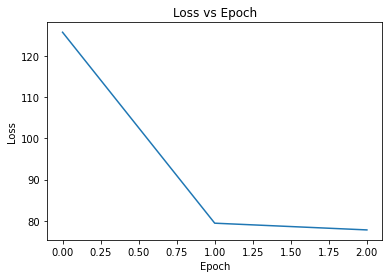

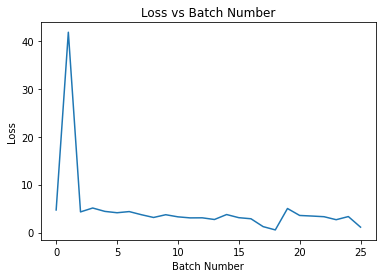

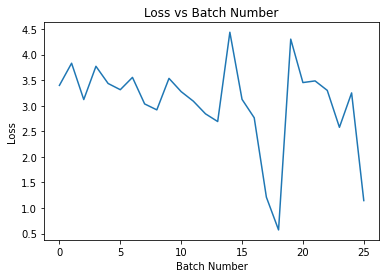

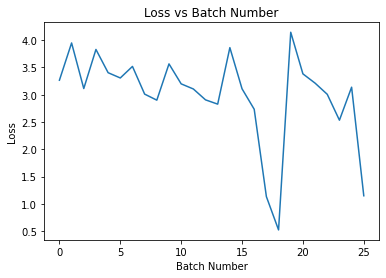

In [23]:
alex_net = AlexNet(100, 0.001, 3)
alex_net.train(train_images, train_labels)

In [24]:
test_images = load_images("test", is_print=True)

Loading images...
Loading images...
image  1  loaded
image  2  loaded
image  3  loaded
image  4  loaded
image  5  loaded
image  6  loaded
image  7  loaded
image  8  loaded
image  9  loaded
image  10  loaded
image  11  loaded
image  12  loaded
image  13  loaded
image  14  loaded
image  15  loaded
image  16  loaded
image  17  loaded
image  18  loaded
image  19  loaded
image  20  loaded
image  21  loaded
image  22  loaded
image  23  loaded
image  24  loaded
image  25  loaded
image  26  loaded
image  27  loaded
image  28  loaded
image  29  loaded
image  30  loaded
image  31  loaded
image  32  loaded
image  33  loaded
image  34  loaded
image  35  loaded
image  36  loaded
image  37  loaded
image  38  loaded
image  39  loaded
image  40  loaded
image  41  loaded
image  42  loaded
image  43  loaded
image  44  loaded
image  45  loaded
image  46  loaded
image  47  loaded
image  48  loaded
image  49  loaded
image  50  loaded
image  51  loaded
image  52  loaded
image  53  loaded
image  54  loaded
i

In [25]:
test_labels = load_labels("test")
test_labels = process_labels(test_labels)
test_labels.shape

(640, 45)

In [26]:
test_labels = np.array(test_labels)

In [27]:
test_images = test_images.transpose(0,3,1,2)

In [28]:
test_images = torch.from_numpy(test_images).float()

In [29]:
alex_net.test(test_images, test_labels)

correct:  19113
total:  28800
Accuracy of the network on the 99 test images: 66.36458333333333 %
Sensitivity:  0.9133034379671151
Specificity:  0.6577085777256407
Precision:  0.05966796875
Recall:  0.9133034379671151


Epoch [1/1], Step [1/2560], Loss: 4.7194
Epoch [1/1], Step [101/2560], Loss: 31.2414
Epoch [1/1], Step [201/2560], Loss: 4.3013
Epoch [1/1], Step [301/2560], Loss: 5.0498
Epoch [1/1], Step [401/2560], Loss: 4.3717
Epoch [1/1], Step [501/2560], Loss: 4.2207
Epoch [1/1], Step [601/2560], Loss: 4.1908
Epoch [1/1], Step [701/2560], Loss: 3.3796
Epoch [1/1], Step [801/2560], Loss: 3.0311
Epoch [1/1], Step [901/2560], Loss: 3.8381
Epoch [1/1], Step [1001/2560], Loss: 3.9052
Epoch [1/1], Step [1101/2560], Loss: 4.1048
Epoch [1/1], Step [1201/2560], Loss: 3.6259
Epoch [1/1], Step [1301/2560], Loss: 3.9064
Epoch [1/1], Step [1401/2560], Loss: 4.2933
Epoch [1/1], Step [1501/2560], Loss: 3.8987
Epoch [1/1], Step [1601/2560], Loss: 3.7407
Epoch [1/1], Step [1701/2560], Loss: 1.3561
Epoch [1/1], Step [1801/2560], Loss: 0.5457
Epoch [1/1], Step [1901/2560], Loss: 5.0562
Epoch [1/1], Step [2001/2560], Loss: 3.8617
Epoch [1/1], Step [2101/2560], Loss: 3.8542
Epoch [1/1], Step [2201/2560], Loss: 3.9531

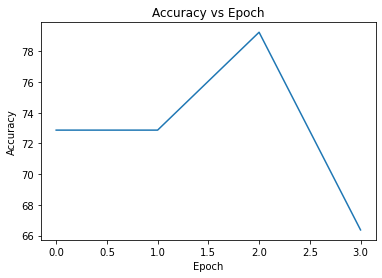

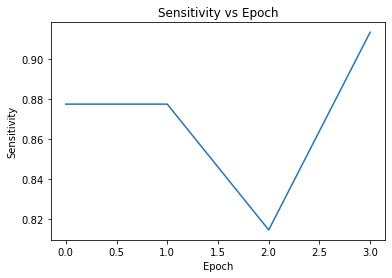

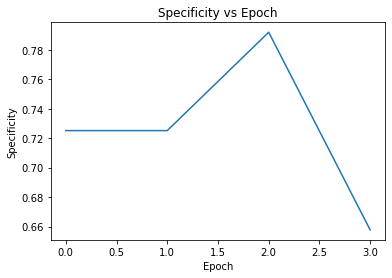

In [34]:
#accuracy,sensitivity, specificity vs epoch
metrics = []
for i in range(1,5,1):
    alex_net = AlexNet(100, 0.001, i)
    alex_net.train(train_images, train_labels)
    accuracy, sensitivity, specificity = alex_net.test(test_images, test_labels)
    metrics.append((accuracy, sensitivity, specificity))

#plot accuracy vs epoch
accuracy = []
sensitivity = []
specificity = []
for i in range(len(metrics)):
    accuracy.append(metrics[i][0])
    sensitivity.append(metrics[i][1])
    specificity.append(metrics[i][2])
plt.plot(accuracy)
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#plot sensitivity vs epoch
plt.plot(sensitivity)
plt.title('Sensitivity vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Sensitivity')
plt.show()

#plot specificity vs epoch
plt.plot(specificity)
plt.title('Specificity vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Specificity')
plt.show()